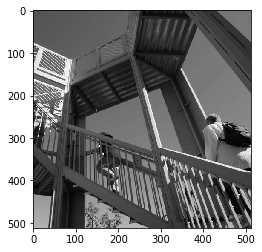

In [1]:
from scipy import misc
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


img = misc.ascent()
plt.gray()
plt.imshow(img)

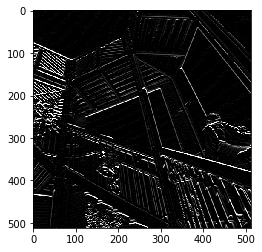

In [2]:
filter = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
# filter = filter.T


features = img.copy()
for i in range(1, img.shape[0] - 1):
    for j in range(1, img.shape[1] - 1):
        conv = img[i - 1, j - 1] * filter[0][0]
        conv += img[i - 1, j] * filter[0][1]
        conv += img[i - 1, j + 1] * filter[0][2]
        conv += img[i, j - 1] * filter[1][0]
        conv += img[i, j] * filter[1][1]
        conv += img[i, j + 1] * filter[1][2]
        conv += img[i + 1, j - 1] * filter[2][0]
        conv += img[i + 1, j] * filter[2][1]
        conv += img[i + 1, j + 1] * filter[2][2]
        
        conv = 0. if min(conv, 255.) < 0 else min(conv, 255.) 
        
        features[i, j] = conv
        
plt.imshow(features)        

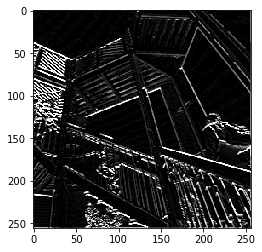

In [4]:
pool_img = np.zeros((img.shape[0] // 2, img.shape[1] // 2))

for i in range(0, features.shape[0], 2):
    for j in range(0, features.shape[1], 2):
        pool_img[i // 2, j // 2] = np.max(features[i:i+2, j:j+2])
        
plt.imshow(pool_img)        

In [6]:
import tensorflow as tf
tf.keras.backend.set_image_data_format('channels_last')

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train / 255.
x_test = x_test / 255.

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 2s 30us/sample - loss: 0.7386 - acc: 0.7637
Epoch 2/5
60000/60000 [==============================] - 2s 34us/sample - loss: 0.5098 - acc: 0.8276
Epoch 3/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.4667 - acc: 0.8401
Epoch 4/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.4416 - acc: 0.8475
Epoch 5/5
10000/10000 [==============================] - 0s 13us/sample - loss: 0.4824 - acc: 0.8289


[0.4824205273151398, 0.8289]

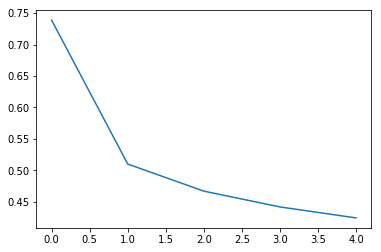

In [7]:
plt.plot(history.history['loss'])

In [8]:
import time

In [9]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

tic = time.perf_counter()
history = model.fit(x_train, y_train, epochs=5)
toc = time.perf_counter()
print ("\nTraining time = " + str(toc - tic) + " sec.")
model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 17s 290us/sample - loss: 0.8956 - acc: 0.6746
Epoch 2/5
60000/60000 [==============================] - 17s 290us/sample - loss: 0.5335 - acc: 0.8015
Epoch 3/5
60000/60000 [==============================] - 17s 290us/sample - loss: 0.4671 - acc: 0.8281
Epoch 4/5
60000/60000 [==============================] - 18s 294us/sample - loss: 0.4264 - acc: 0.8447
Epoch 5/5
60000/60000 [==============================] - 18s 293us/sample - loss: 0.3981 - acc: 0.8553

Training time = 87.60730248799882 sec.
10000/10000 [==============================] - 1s 88us/sample - loss: 0.4137 - acc: 0.8534


[0.4137226962566376, 0.8534]

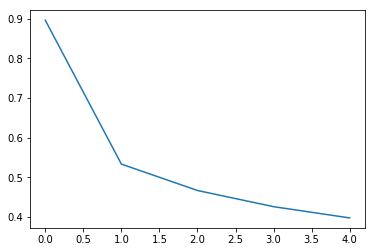

In [10]:
plt.plot(history.history['loss'])

EXERCISES
===

 - Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.
 - Remove the final Convolution. What impact will this have on accuracy or training time?
 - How about adding more Convolutions? What impact do you think this will have? Experiment with it.
 - Remove all Convolutions but the first. What impact do you think this will have? Experiment with it.
 - In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here!

### Change the 32s to 16

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

tic = time.process_time()
history = model.fit(x_train, y_train, epochs=5)
toc = time.process_time()
print ("\nTraining time = " + str(toc - tic) + " sec.")
model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 11s 176us/sample - loss: 0.8962 - acc: 0.6770
Epoch 2/5
60000/60000 [==============================] - 10s 173us/sample - loss: 0.5597 - acc: 0.7919
Epoch 3/5
60000/60000 [==============================] - 12s 192us/sample - loss: 0.4818 - acc: 0.8239
Epoch 4/5
60000/60000 [==============================] - 9s 151us/sample - loss: 0.4394 - acc: 0.8416
Epoch 5/5
60000/60000 [==============================] - 9s 153us/sample - loss: 0.4097 - acc: 0.8521

Training time = 143.07394233000002 sec.
10000/10000 [==============================] - 1s 64us/sample - loss: 0.4320 - acc: 0.8425


[0.4319906057238579, 0.8425]

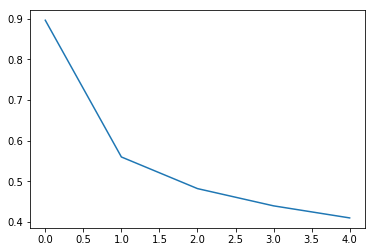

In [12]:
plt.plot(history.history['loss'])

<table> 
<tr>
    <td> 
    **Number of filters**
    </td>
    <td> 
      **32**
    </td>
    <td> 
      **16**
    </td>
</tr>
<tr>
    <td> 
    **Accuracy**
    </td>
    <td> 
      85.34%
    </td>
    <td> 
      84.25%
    </td> 
</tr> 
<tr>
    <td> 
    **Training time (sec)**
    </td>
    <td> 
      88
    </td>
    <td> 
      143
    </td> 
</tr> 
</table>

### Change the 32s to 64

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

tic = time.process_time()
history = model.fit(x_train, y_train, epochs=5)
toc = time.process_time()
print ("\nTraining time = " + str(toc - tic) + " sec.")
model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 37s 620us/sample - loss: 0.8766 - acc: 0.6880
Epoch 2/5
60000/60000 [==============================] - 39s 646us/sample - loss: 0.5290 - acc: 0.8035
Epoch 3/5
60000/60000 [==============================] - 39s 654us/sample - loss: 0.4557 - acc: 0.8340
Epoch 4/5
60000/60000 [==============================] - 35s 576us/sample - loss: 0.4148 - acc: 0.8502
Epoch 5/5
60000/60000 [==============================] - 36s 596us/sample - loss: 0.3844 - acc: 0.8615

Training time = 652.847429599 sec.
10000/10000 [==============================] - 1s 142us/sample - loss: 0.3976 - acc: 0.8565


[0.3976282670736313, 0.8565]

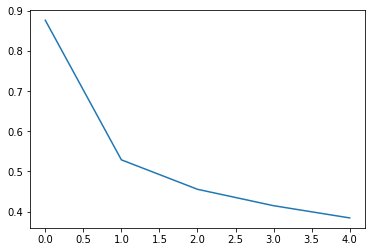

In [14]:
plt.plot(history.history['loss'])

<table> 
<tr>
    <td> 
    **Number of filters**
    </td>
    <td> 
      **32**
    </td>
    <td> 
      **16**
    </td>
    <td> 
      **64**
    </td> 
</tr>
<tr>
    <td> 
    **Accuracy**
    </td>
    <td>
      85.34%
    </td>
    <td> 
      84.25%
    </td>
    <td> 
      85.65%
    </td>
</tr> 
<tr>
    <td> 
    **Training time (sec)**
    </td>
    <td> 
      88
    </td>
    <td> 
      143
    </td>
    <td> 
      653
    </td> 
</tr> 
</table>

### Remove the final Convolution

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

tic = time.perf_counter()
history = model.fit(x_train, y_train, epochs=5)
toc = time.perf_counter()
print ("\nTraining time = " + str(toc - tic) + " sec.")
model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 15s 256us/sample - loss: 0.7036 - acc: 0.7558
Epoch 2/5
60000/60000 [==============================] - 16s 270us/sample - loss: 0.4791 - acc: 0.8285
Epoch 3/5
60000/60000 [==============================] - 16s 269us/sample - loss: 0.4254 - acc: 0.8491
Epoch 4/5
60000/60000 [==============================] - 17s 278us/sample - loss: 0.3872 - acc: 0.8614
Epoch 5/5
60000/60000 [==============================] - 17s 276us/sample - loss: 0.3614 - acc: 0.8712

Training time = 81.23706850799863 sec.
10000/10000 [==============================] - 1s 81us/sample - loss: 0.3791 - acc: 0.8622


[0.3791347677707672, 0.8622]

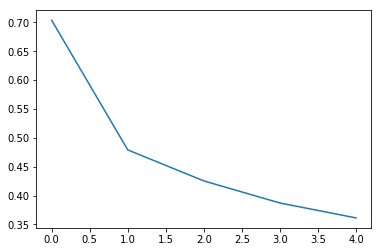

In [16]:
plt.plot(history.history['loss'])

<table> 
<tr>
    <td> 
    **Convolution levels**
    </td>
    <td> 
      **2**
    </td>
    <td> 
      **1**
    </td>
</tr>
<tr>
    <td> 
    **Accuracy**
    </td>
    <td>
      85.34%
    </td>
    <td> 
      86.22%
    </td>
</tr> 
<tr>
    <td> 
    **Training time (sec)**
    </td>
    <td> 
      88
    </td>
    <td> 
      81
    </td>
</tr> 
</table>

### How about adding more Convolutions

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

tic = time.perf_counter()
history = model.fit(x_train, y_train, epochs=5)
toc = time.perf_counter()
print ("\nTraining time = " + str(toc - tic) + " sec.")
model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 17s 277us/sample - loss: 1.3338 - acc: 0.4927
Epoch 2/5
60000/60000 [==============================] - 16s 269us/sample - loss: 0.7456 - acc: 0.7171
Epoch 3/5
60000/60000 [==============================] - 16s 273us/sample - loss: 0.6507 - acc: 0.7556
Epoch 4/5
60000/60000 [==============================] - 17s 280us/sample - loss: 0.5899 - acc: 0.7825
Epoch 5/5
60000/60000 [==============================] - 17s 288us/sample - loss: 0.5557 - acc: 0.7936

Training time = 83.58602588899885 sec.
10000/10000 [==============================] - 1s 83us/sample - loss: 0.5870 - acc: 0.7828


[0.5869749907970429, 0.7828]

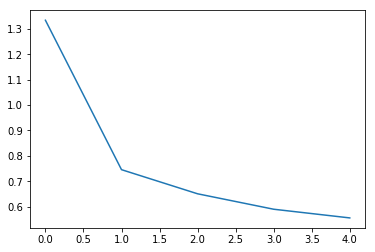

In [18]:
plt.plot(history.history['loss'])

<table> 
<tr>
    <td> 
    **Convolution levels**
    </td>
    <td> 
      **2**
    </td>
    <td> 
      **1**
    </td>
    <td> 
      **3**
    </td>
</tr>
<tr>
    <td> 
    **Accuracy**
    </td>
    <td>
      85.34%
    </td>
    <td> 
      86.22%
    </td>
    <td> 
      78.28%
    </td>
</tr> 
<tr>
    <td> 
    **Training time (sec)**
    </td>
    <td> 
      88
    </td>
    <td> 
      81
    </td>
    <td> 
      84
    </td>
</tr> 
</table>

### Implemente a callback

Implemente a callback to check on the loss function and to cancel training once it hit a certain amount.

In [19]:
LOSS_THRESHOLD = 0.30

class myCallback(tf.keras.callbacks.Callback): 
 def on_epoch_end(self, epoch, logs={}): 
     if(logs.get('loss') < LOSS_THRESHOLD): 
         print("\nReached %2.2f%% loss, so stopping training!" %(LOSS_THRESHOLD*100)) 
         self.model.stop_training = True
    
callback = myCallback() 

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, callbacks=[callback])

model.evaluate(x_test, y_test)

Epoch 1/20
60000/60000 [==============================] - 17s 282us/sample - loss: 0.8848 - acc: 0.6800
Epoch 2/20
60000/60000 [==============================] - 17s 279us/sample - loss: 0.5466 - acc: 0.7976
Epoch 3/20
60000/60000 [==============================] - 18s 292us/sample - loss: 0.4727 - acc: 0.8262
Epoch 4/20
60000/60000 [==============================] - 18s 303us/sample - loss: 0.4274 - acc: 0.8443
Epoch 5/20
60000/60000 [==============================] - 16s 275us/sample - loss: 0.3974 - acc: 0.8553
Epoch 6/20
60000/60000 [==============================] - 17s 278us/sample - loss: 0.3768 - acc: 0.8625
Epoch 7/20
60000/60000 [==============================] - 17s 284us/sample - loss: 0.3603 - acc: 0.8695
Epoch 8/20
60000/60000 [==============================] - 19s 322us/sample - loss: 0.3461 - acc: 0.8731
Epoch 9/20
60000/60000 [==============================] - 19s 310us/sample - loss: 0.3351 - acc: 0.8772
Epoch 10/20
60000/60000 [==============================] - 20s 3

[0.3397582072019577, 0.8769]

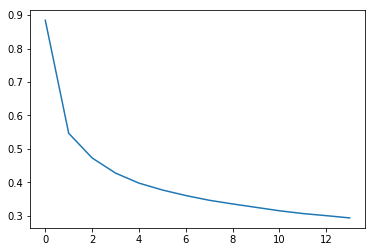

In [20]:
plt.plot(history.history['loss'])